In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [24]:
# df = pd.read_excel("Downloads/Omnify-Analyst-Intership-Task.xlsx")
df = pd.read_csv(r"C:\Users\Admin\Desktop\Omnify\dataa.csv")

In [28]:
# Step 1: Check for Missing Values
missing_values_count = df.isnull().sum()
print("Missing Values:")
print(missing_values_count)

Missing Values:
Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      0
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64


In [30]:
# Step 2: Handle Missing Values (if necessary)
mean_values = df.mean()
df.fillna(mean_values, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10004\2863906952.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()


In [31]:
# Step 3: Convert 'Payment Date' Column to Datetime Format
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

In [32]:
# Step 1: Check for Missing Values
missing_values_count = df.isnull().sum()
print("Missing Values:")
print(missing_values_count)

Missing Values:
Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      0
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64


In [33]:
# Step 2: Handle Missing Values (if necessary)
# For example, let's fill missing values with zeros for 'Cost ($)' and 'Payment ($)'
df['Cost ($)'].fillna(0, inplace=True)
df['Payment ($)'].fillna(0, inplace=True)


In [34]:
# Step 3: Convert 'Payment Date' Column to Datetime Format
df['Payment Date'] = pd.to_datetime(df['Payment Date'])


In [40]:
# Step 4: Data Cleaning - Remove non-numeric characters from 'Cost ($)' and 'Payment ($)'
def clean_numeric_value(value):
        try:
            if pd.notna(value):  # Check if the value is not NaN
                cleaned_value = re.sub('[^\d.]', '', str(value))
                return float(cleaned_value) if cleaned_value else 0
            else:
                return 0
        except ValueError:
            return 0

In [41]:
df['Cost ($)'] = df['Cost ($)'].apply(clean_numeric_value)
df['Payment ($)'] = df['Payment ($)'].apply(clean_numeric_value)


In [76]:
 # Step 5: Create boolean columns to indicate missing values
df['Payment Date Missing'] = df['Payment Date'].isnull()
df['week Missing'] = df['Week'].isnull()
df['month'] = df['Payment Date'].dt.month



In [77]:
df.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country', 'Payment Date Missing',
       'week Missing', 'ROS', 'Cumulative Clicks', 'Cumulative Impressions',
       'Cumulative Cost', 'Cumulative Leads', 'Cumulative Prospects',
       'Cumulative Payments', 'month'],
      dtype='object')

In [78]:
# Step 6: Weekly and Monthly Aggregation
weekly_metrics = df.groupby('Week').agg(
        total_spends=('Cost ($)', 'sum'),
        total_impressions=('Impressions', 'sum'),
        total_clicks=('Clicks', 'sum'),
        total_prospects=('Prospects', 'sum'),
        total_payments=('Payment ($)', 'sum')
    )

In [79]:
# Step 7: Calculate return on ad spends (ROS) for weekly and monthly data
    # Make sure to handle possible division by zero
weekly_metrics['ROS'] = weekly_metrics['total_payments'] / (weekly_metrics['total_spends'].replace(0, 1))

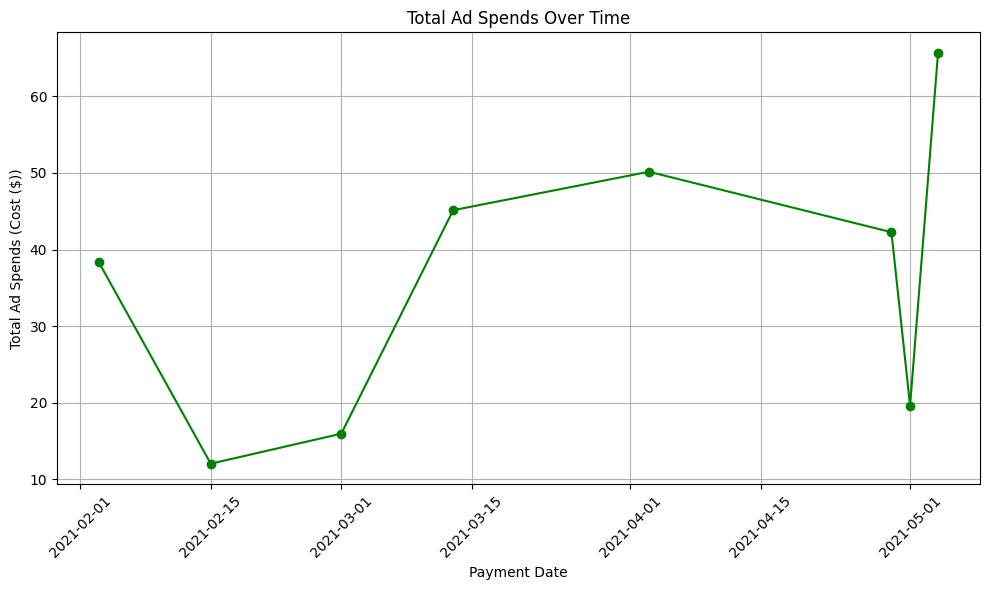

In [80]:
#1)'cost' is our total ad spends for that particular date.
import matplotlib.pyplot as plt

# Step 1: Visualize the total ad spends (Cost ($)) over time
plt.figure(figsize=(10, 6))
plt.plot(df['Payment Date'], df['Cost ($)'], marker='o', linestyle='-', color='g')
plt.xlabel('Payment Date')
plt.ylabel('Total Ad Spends (Cost ($))')
plt.title('Total Ad Spends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

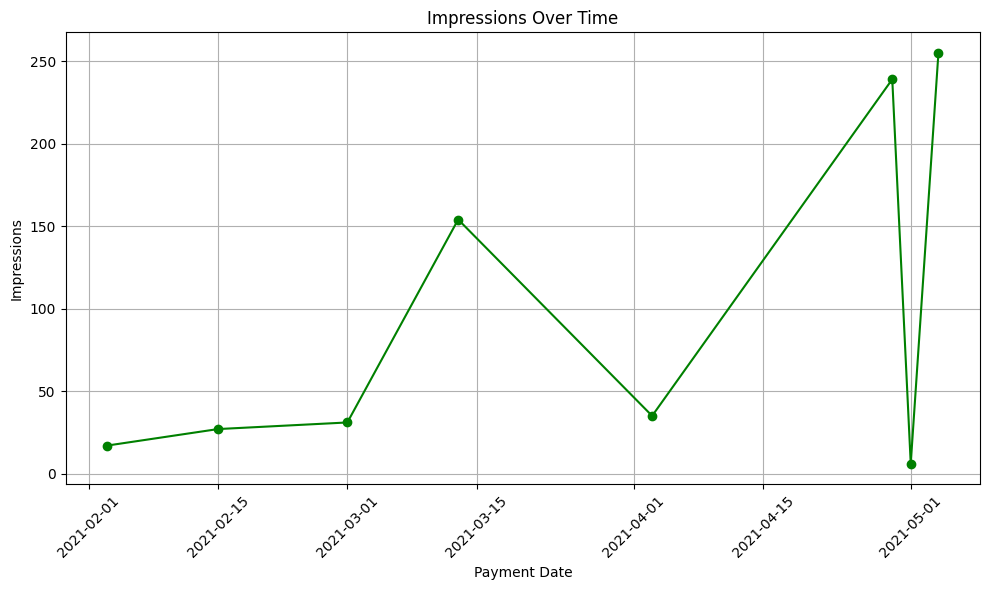

In [81]:
#2)Impressions' are the count of people who view our ad
import matplotlib.pyplot as plt

# Step 1: Visualize the count of impressions over time
plt.figure(figsize=(10, 6))
plt.plot(df['Payment Date'], df['Impressions'], marker='o', linestyle='-', color='g')
plt.xlabel('Payment Date')
plt.ylabel('Impressions')
plt.title('Impressions Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

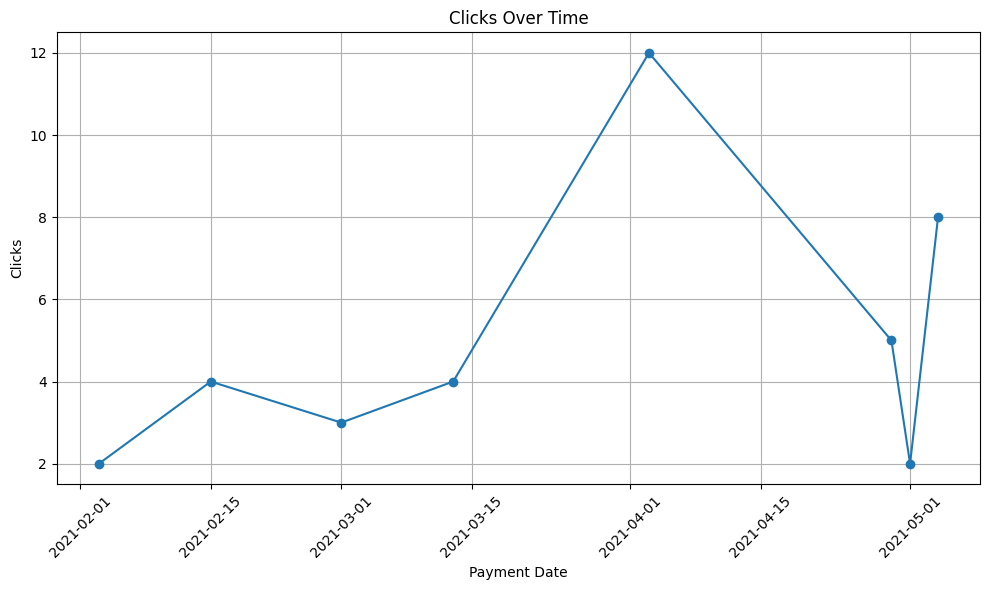

In [82]:
#3) 'clicks' are count of clicks on our ad
import matplotlib.pyplot as plt

# Step 1: Group the data by 'Payment Date' and sum the 'Clicks' for each date
clicks_data = df.groupby('Payment Date')['Clicks'].sum()

# Step 2: Visualize the count of clicks over time using a line plot
plt.figure(figsize=(10, 6))
plt.plot(clicks_data.index, clicks_data.values, marker='o', linestyle='-')
plt.xlabel('Payment Date')
plt.ylabel('Clicks')
plt.title('Clicks Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

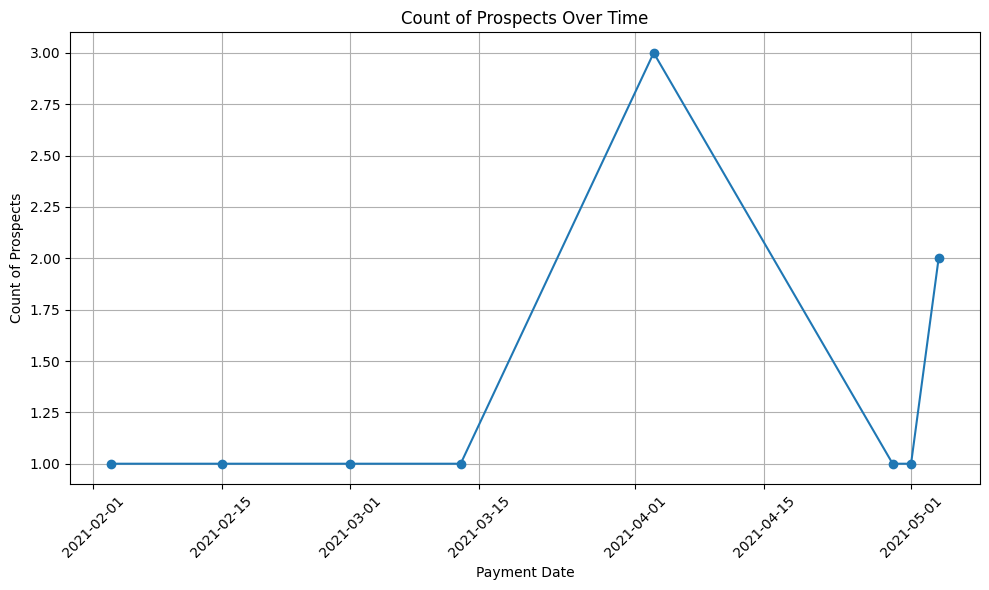

In [83]:
#4)prospects' are count of people interested in our product (as marked by sales)
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df', ensure 'Payment Date' is of datetime type
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

# Group by 'Payment Date' and calculate the total count of prospects for each date
prospects_over_time = df.groupby('Payment Date')['Prospects'].sum()

# Plot the count of prospects over time
plt.figure(figsize=(10, 6))
plt.plot(prospects_over_time.index, prospects_over_time.values, marker='o')
plt.xlabel('Payment Date')
plt.ylabel('Count of Prospects')
plt.title('Count of Prospects Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

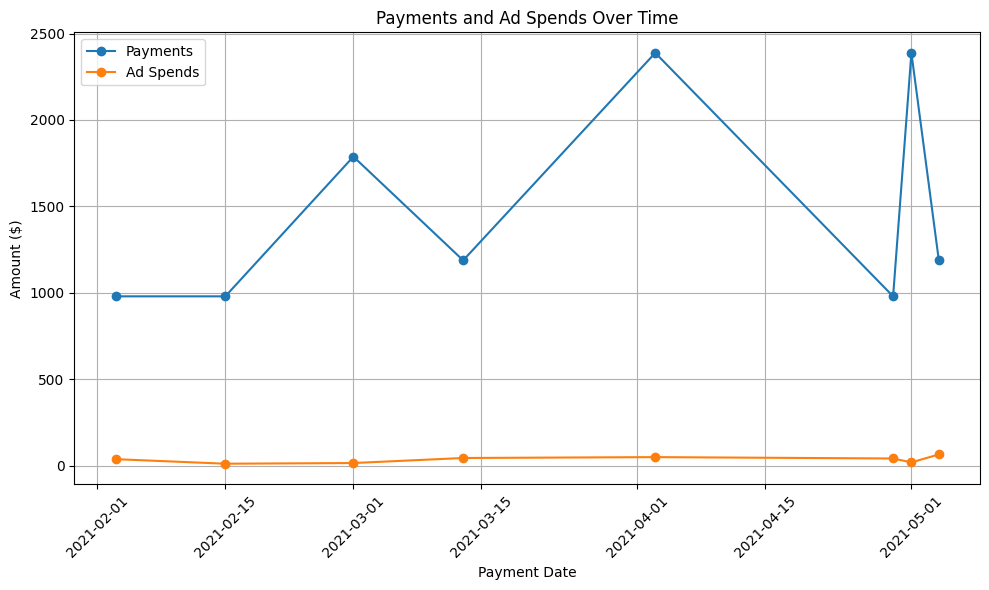

In [84]:
#5)- 'Payments' are purchases made. Returns on Ad spends are calculated using Payments/Cost.
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df', ensure 'Payment Date' is of datetime type
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

# Calculate the return on ad spends (ROS) for each row
df['ROS'] = df['Payment ($)'] / df['Cost ($)']

# Group by 'Payment Date' and calculate the total payments and ad spends for each date
payments_over_time = df.groupby('Payment Date')['Payment ($)'].sum()
ad_spends_over_time = df.groupby('Payment Date')['Cost ($)'].sum()

# Plot payments and ad spends over time
plt.figure(figsize=(10, 6))
plt.plot(payments_over_time.index, payments_over_time.values, label='Payments', marker='o')
plt.plot(ad_spends_over_time.index, ad_spends_over_time.values, label='Ad Spends', marker='o')
plt.xlabel('Payment Date')
plt.ylabel('Amount ($)')
plt.title('Payments and Ad Spends Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

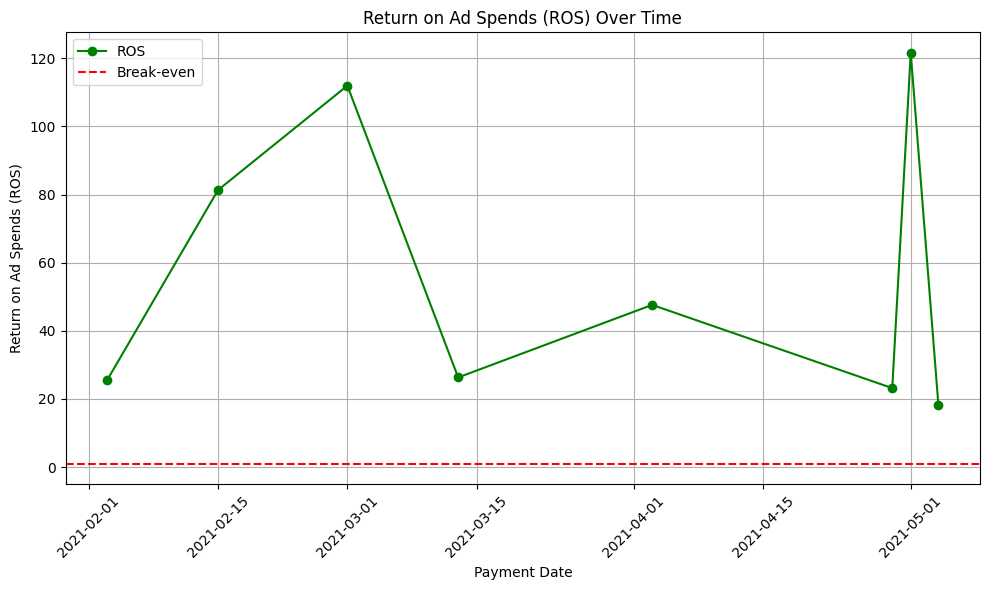

In [85]:
# Plot return on ad spends (ROS) over time
plt.figure(figsize=(10, 6))
plt.plot(df['Payment Date'], df['ROS'], label='ROS', marker='o', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='Break-even')
plt.xlabel('Payment Date')
plt.ylabel('Return on Ad Spends (ROS)')
plt.title('Return on Ad Spends (ROS) Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [86]:
#6) Each row is cohortised to the date of ad spends so you can compare quality of ad spends.
# Assuming your DataFrame is named 'df' and 'Payment Date' is of datetime type
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

# Sort the DataFrame by 'Payment Date' in ascending order
df.sort_values('Payment Date', inplace=True)

# Group by 'Payment Date' and calculate cumulative metrics for each cohort
df['Cumulative Clicks'] = df.groupby('Payment Date')['Clicks'].cumsum()
df['Cumulative Impressions'] = df.groupby('Payment Date')['Impressions'].cumsum()
df['Cumulative Cost'] = df.groupby('Payment Date')['Cost ($)'].cumsum()
df['Cumulative Leads'] = df.groupby('Payment Date')['Leads'].cumsum()
df['Cumulative Prospects'] = df.groupby('Payment Date')['Prospects'].cumsum()
df['Cumulative Payments'] = df.groupby('Payment Date')['Payment ($)'].cumsum()

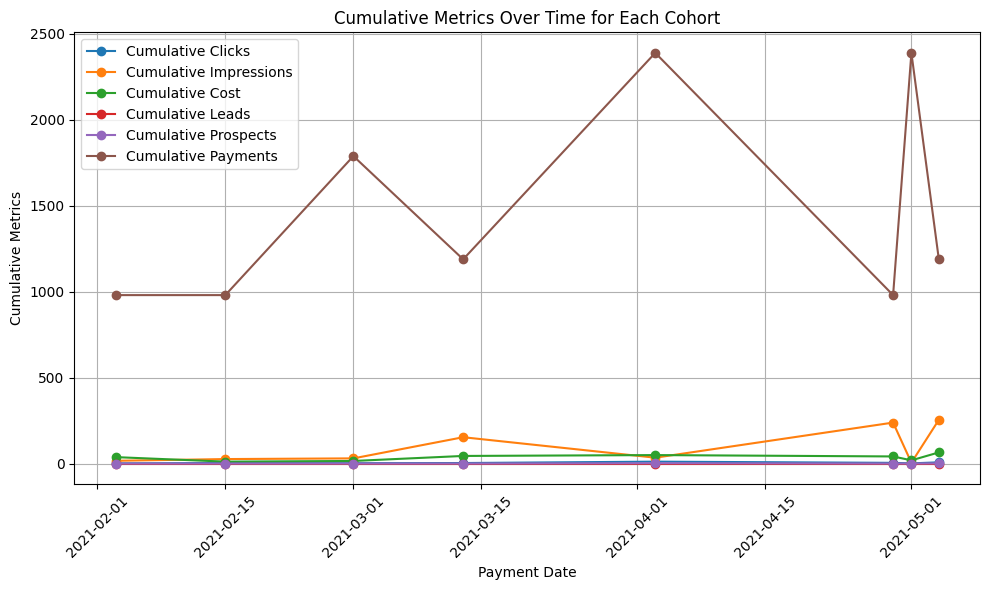

In [87]:
# Plot cumulative metrics for each cohort
plt.figure(figsize=(10, 6))
plt.plot(df['Payment Date'], df['Cumulative Clicks'], label='Cumulative Clicks', marker='o')
plt.plot(df['Payment Date'], df['Cumulative Impressions'], label='Cumulative Impressions', marker='o')
plt.plot(df['Payment Date'], df['Cumulative Cost'], label='Cumulative Cost', marker='o')
plt.plot(df['Payment Date'], df['Cumulative Leads'], label='Cumulative Leads', marker='o')
plt.plot(df['Payment Date'], df['Cumulative Prospects'], label='Cumulative Prospects', marker='o')
plt.plot(df['Payment Date'], df['Cumulative Payments'], label='Cumulative Payments', marker='o')

plt.xlabel('Payment Date')
plt.ylabel('Cumulative Metrics')
plt.title('Cumulative Metrics Over Time for Each Cohort')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
# Task 1: Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format.

import pandas as pd

# Step 1: Group data by week and calculate weekly metrics
weekly_metrics = df.groupby('Week').agg(
    total_spends=('Cost ($)', 'sum'),
    total_payments=('Payment ($)', 'sum'),
)

# Calculate returns percentage for weekly data
weekly_metrics['Returns (%)'] = (weekly_metrics['total_payments'] / weekly_metrics['total_spends']) * 100

In [89]:
# Step 2: Group data by month and calculate monthly metrics
monthly_metrics = df.groupby('month').agg(
    total_spends=('Cost ($)', 'sum'),
    total_payments=('Payment ($)', 'sum'),)

In [90]:
# Calculate returns percentage for monthly data
monthly_metrics['Returns (%)'] = (monthly_metrics['total_payments'] / monthly_metrics['total_spends']) * 100

In [91]:
# Step 3: Combine weekly and monthly metrics into a single report
combined_report = pd.concat([weekly_metrics, monthly_metrics], keys=['Weekly', 'Monthly'])
print(combined_report)

                   total_spends  total_payments  Returns (%)
Weekly  1-Feb-21         192.58             0.0     0.000000
        1-Mar-21         141.40           980.0   693.069307
        12-Apr-21        137.21          2388.0  1740.397930
        15-Feb-21        235.30          1788.0   759.881003
        15-Mar-21        184.36             0.0     0.000000
        19-Apr-21         87.38             0.0     0.000000
        22-Feb-21        190.90             0.0     0.000000
        22-Mar-21        308.73          2388.0   773.491400
        25-Jan-21        154.79          2168.0  1400.607274
        26-Apr-21        103.26             0.0     0.000000
        29-Mar-21        172.11             0.0     0.000000
        3-May-21         229.37          1188.0   517.940446
        5-Apr-21         176.96             0.0     0.000000
        8-Feb-21         216.13           980.0   453.430806
        8-Mar-21         258.20             0.0     0.000000
Monthly 2.0             

In [92]:
# Task 2: Which is the most profitable channel
most_profitable_channel = df.groupby('Campaign')['Payment ($)'].sum().idxmax()
print("The most profitable channel is:", most_profitable_channel)


The most profitable channel is: EK_Generic_Tri-Tok_Reservation


In [93]:
# Task 3: Which category/keyword is the most profitable
most_profitable_keyword = df.groupby('Keyword type')['Payment ($)'].sum().idxmax()
print("The most profitable keyword type is:", most_profitable_keyword)

The most profitable keyword type is: Broad


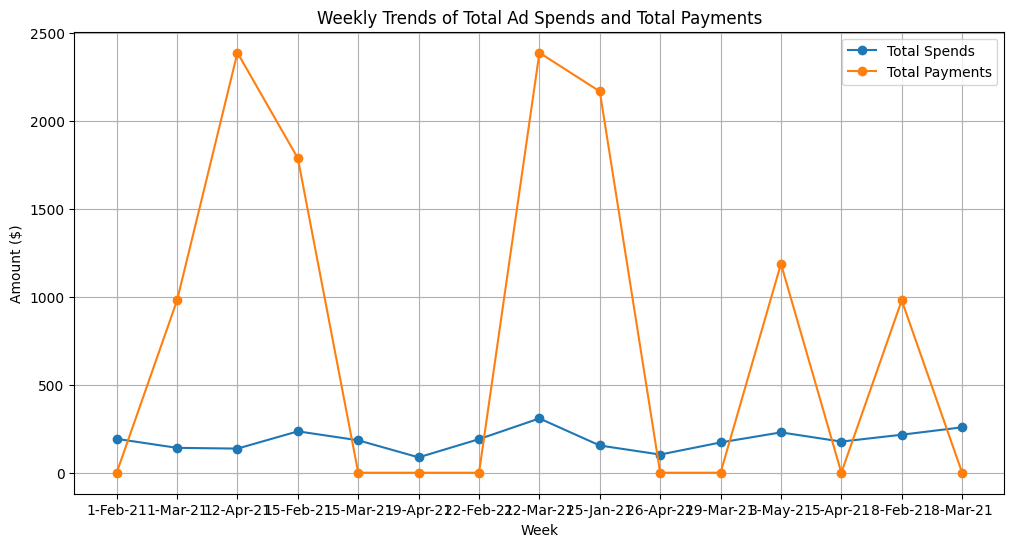

In [94]:
# Task 4: Look for insights by analyzing data points on time series graphs
import matplotlib.pyplot as plt

# Plot weekly trends of total ad spends and total payments
plt.figure(figsize=(12, 6))
plt.plot(weekly_metrics.index, weekly_metrics['total_spends'], label='Total Spends', marker='o')
plt.plot(weekly_metrics.index, weekly_metrics['total_payments'], label='Total Payments', marker='o')
plt.xlabel('Week')
plt.ylabel('Amount ($)')
plt.title('Weekly Trends of Total Ad Spends and Total Payments')
plt.legend()
plt.grid(True)
plt.show()

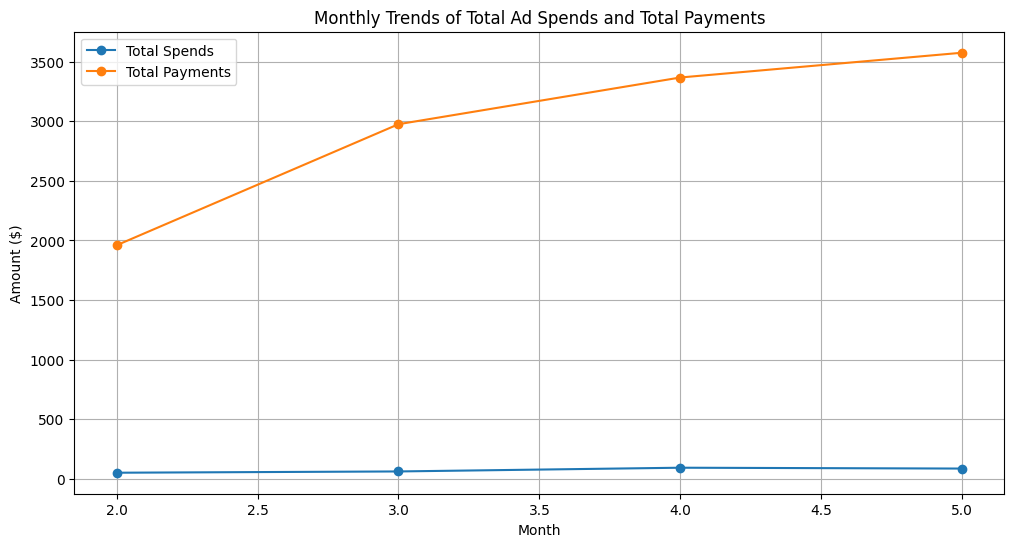

In [95]:
# Plot monthly trends of total ad spends and total payments
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics.index, monthly_metrics['total_spends'], label='Total Spends', marker='o')
plt.plot(monthly_metrics.index, monthly_metrics['total_payments'], label='Total Payments', marker='o')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Monthly Trends of Total Ad Spends and Total Payments')
plt.legend()
plt.grid(True)
plt.show()


In [96]:
# Task 5: Analyze the Impact of geography
geo_metrics = df.groupby('Country').agg(
    total_spends=('Cost ($)', 'sum'),
    total_payments=('Payment ($)', 'sum'),
)

# Calculate returns percentage for each country
geo_metrics['Returns (%)'] = (geo_metrics['total_payments'] / geo_metrics['total_spends']) * 100

print(geo_metrics)

         total_spends  total_payments  Returns (%)
Country                                           
USA           2788.68         11880.0   426.008004
